In [214]:
from dtw import dtw
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import style
#style.use("gunplot")
from sklearn.cluster import KMeans
%matplotlib inline
from osgeo import gdal
from sklearn.externals import joblib
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import time as t
import math

In [ ]:
def graph(x, y):
    files = ["/home/faizan/Pakistan/EVI/2010/sindh.2010%03d"  % (i) + ".tif" for i in range(1, 363) ]
    ds = gdal.Open(files[0])
    evi = np.array([ds.ReadAsArray()[(x, y)]])
    for i in files[1:]:
        ds = gdal.Open(i)
        evi = np.vstack([evi, ds.ReadAsArray()[(x, y)]])
    #plt.plot(range(91, len(evi)+91), evi / 10000.)
    plt.plot(range(0, len(evi)), evi / 10000.)
    plt.show()

In [ ]:
x, y = (687, 693)
graph(x, y)

In [158]:
EVI_path= "/home/faizan/HDD1/EVI/CSV/Pak_crop_all_point_evi.csv"
data1 = pd.read_csv(EVI_path)
for p in range(49):

    data = data1[data1["ID"] == p]
    dates = [datetime.datetime.strptime(str(k), "%Y%j") for k in data["DATE"]]
    data.index = dates
    dummy = data[data.index.year > 2008]
    dummy = dummy[dummy.index.year < 2010]
    dummy = dummy[dummy.index.month > 5]
    time = dummy.index
    evi  = dummy["EVI"]
    time1=dummy["DATE"]
"""

data = data1[data1["ID"] == 18]
dates = [datetime.datetime.strptime(str(k), "%Y%j") for k in data["DATE"]]
data.index = dates
dummy = data[data.index.year > 2008]
dummy = dummy[dummy.index.year < 2010]
dummy = dummy[dummy.index.month > 5]
time = dummy.index
evi2  = dummy["EVI"]
time2=dummy["DATE"]

data = data1[data1["ID"] == 4]
dates = [datetime.datetime.strptime(str(k), "%Y%j") for k in data["DATE"]]
data.index = dates
dummy = data[data.index.year > 2008]
dummy = dummy[dummy.index.year < 2010]
dummy = dummy[dummy.index.month > 5]
time = dummy.index
evi3  = dummy["EVI"]
time3=dummy["DATE"]
"""

In [159]:
def euclid_dist(t1,t2):
    return np.sqrt(sum((t1-t2)**2))

In [160]:
print euclid_dist(evi,evi2)

12727.2726065


In [161]:
print euclid_dist(evi,evi3)

26396.9956245


In [162]:
print euclid_dist(evi2,evi3)

19748.9908603


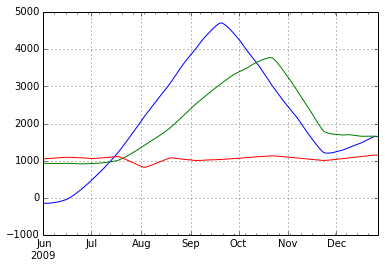

In [174]:
evi.plot()
evi2.plot()
evi3.plot()

In [44]:
def DTWDistance(s1, s2):
    DTW={}
    
    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
		
    return np.sqrt(DTW[len(s1)-1, len(s2)-1])

In [47]:
print DTWDistance(evi,evi2)

8457.13645391


In [48]:
print DTWDistance(evi,evi3)

25432.5154674


In [51]:
def DTWDistance(s1, s2,w):
    DTW={}
    
    w = max(w, abs(len(s1)-len(s2)))
    
    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0
  
    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return np.sqrt(DTW[len(s1)-1, len(s2)-1])

In [52]:
print DTWDistance(evi,evi2,10)

11510.2210231


In [55]:
def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):
        
        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        
        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2
    
    return np.sqrt(LB_sum)

In [57]:
print LB_Keogh(evi,evi2,30)

8731.32567254


In [90]:
from sklearn.metrics import classification_report

def knn(train,test,w):
    preds=[]
    for ind,i in enumerate(test):
        min_dist=float('inf')
        closest_seq=[]
        print ind
        print min_dist
        for j in train:
            if LB_Keogh(i[:-1],j[:-1],5)<min_dist:
                dist=DTWDistance(i[:-1],j[:-1],w)
                if dist<min_dist:
                    min_dist=dist
                    closest_seq=j
        preds.append(closest_seq[-1])
    return classification_report(test[:,-1],preds)

In [92]:
print knn(E,E,4)

0
inf
1
inf
             precision    recall  f1-score   support

     1648.0       1.00      1.00      1.00         1
     1655.0       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00         2



In [85]:
E = np.vstack((evi, evi2))
T = np.vstack((evi2, evi3))

In [94]:
E[:,-1]

array([ 1655.,  1648.])

In [200]:
EVI_path= "/home/faizan/HDD1/EVI/CSV/Pak_crop_all_point_evi.csv"
data1 = pd.read_csv(EVI_path)
for p in range(49):

    data = data1[data1["ID"] == p]
    dates = [datetime.datetime.strptime(str(k), "%Y%j") for k in data["DATE"]]
    data.index = dates
    dummy = data[data.index.year > 2008]
    dummy = dummy[dummy.index.year < 2010]
    dummy = dummy[dummy.index.month > 5]
    time = dummy.index
    evi  = dummy["EVI"]
    time1=dummy["DATE"]
    if p==0:
        comb=evi
    else:
        comb=np.vstack((comb, evi))
    

In [204]:
len(comb[2])

210

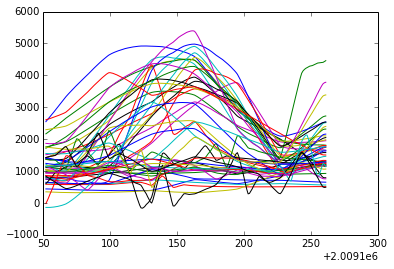

In [232]:
for i in range(49):  
    plt.plot(time1,comb[i])
plt.show()


In [211]:
import random

def k_means_clust(data,num_clust,num_iter,w=5):
    centroids=random.sample(data,num_clust)
    counter=0
    for n in range(num_iter):
        counter+=1
        #print counter
        assignments={}
        #assign data points to clusters
        for ind,i in enumerate(data):
            min_dist=float('inf')
            closest_clust=None
            for c_ind,j in enumerate(centroids):
                if LB_Keogh(i,j,5)<min_dist:
                    cur_dist=DTWDistance(i,j,w)
                    if cur_dist<min_dist:
                        min_dist=cur_dist
                        closest_clust=c_ind
            if closest_clust in assignments:
                assignments[closest_clust].append(ind)
            else:
                assignments[closest_clust]=[]
    
        #recalculate centroids of clusters
        for key in assignments:
            #print assignments
            clust_sum=0
            for k in assignments[key]:
                clust_sum=clust_sum+data[k]
                
            centroids[key]=[m/len(assignments[key]) for m in clust_sum]
    
    return centroids

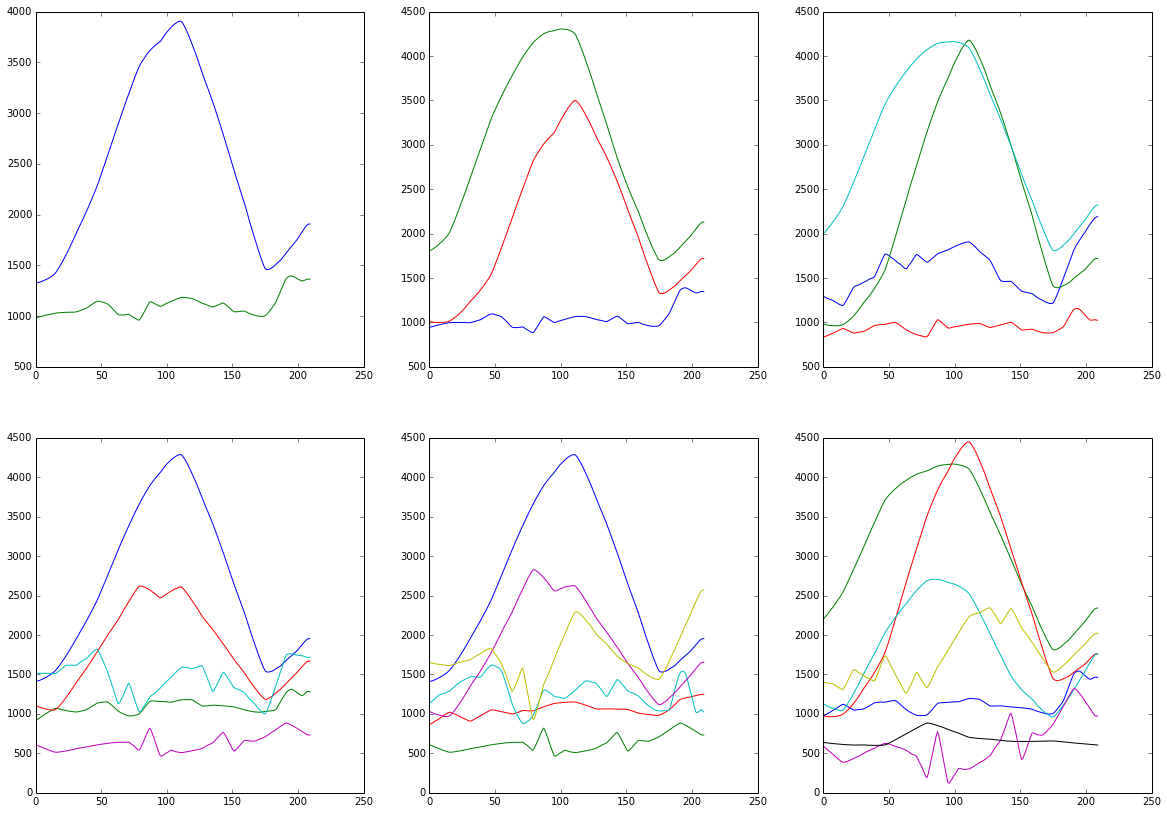

In [253]:
#train = np.genfromtxt('datasets/train.csv', delimiter='\t')
#test = np.genfromtxt('datasets/test.csv', delimiter='\t')




plt.figure(figsize=(20, 14))

for clu in xrange(2,8):
    centroids=k_means_clust(comb,clu,10,5)
    for i in centroids:
            plt.subplot(2,3,clu-1)
            plt.plot(i)
plt.show()

In [256]:
centroids=random.sample(comb,6)
for c_ind,j in enumerate(centroids):
    #print j
    print c_ind

0
1
2
3
4
5


In [257]:
centroids

[array([  -19.,    67.,   162.,   269.,   365.,   462.,   570.,   679.,
          787.,   894.,   994.,  1091.,  1202.,  1305.,  1402.,  1476.,
         1481.,  1458.,  1428.,  1386.,  1348.,  1308.,  1256.,  1205.,
         1165.,  1128.,  1092.,  1054.,  1006.,   958.,   911.,   871.,
          850.,   838.,   826.,   817.,   808.,   799.,   793.,   786.,
          770.,   752.,   735.,   719.,   705.,   692.,   680.,   670.,
          665.,   663.,   662.,   662.,   661.,   662.,   663.,   665.,
          669.,   673.,   678.,   683.,   689.,   695.,   702.,   707.,
          708.,   707.,   705.,   704.,   704.,   705.,   706.,   707.,
          708.,   710.,   713.,   717.,   720.,   725.,   730.,   738.,
          752.,   770.,   788.,   808.,   828.,   848.,   870.,   891.,
          911.,   931.,   951.,   972.,   993.,  1015.,  1036.,  1058.,
         1080.,  1102.,  1125.,  1147.,  1168.,  1189.,  1210.,  1231.,
         1253.,  1276.,  1297.,  1318.,  1338.,  1358.,  1376., 

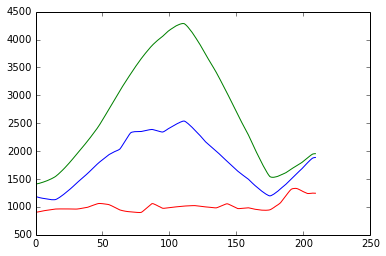

In [234]:
centroids=k_means_clust(comb,3,10,5)
for i in centroids:    
    plt.plot(i)
plt.show()

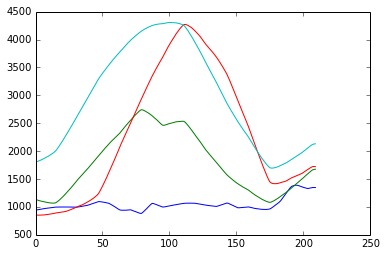

In [228]:
centroids=k_means_clust(comb,4,10,5)
for i in centroids:    
    plt.plot(i)
plt.show()

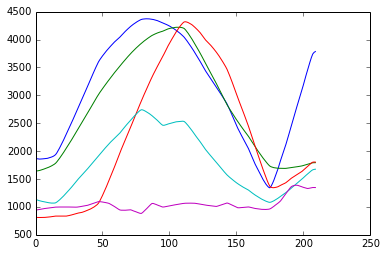

In [229]:
centroids=k_means_clust(comb,5,10,5)
for i in centroids:    
    plt.plot(i)
plt.show()

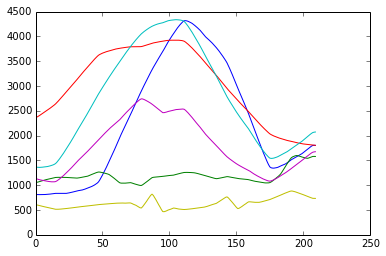

In [230]:
centroids=k_means_clust(comb,6,10,5)
for i in centroids:    
    plt.plot(i)
plt.show()

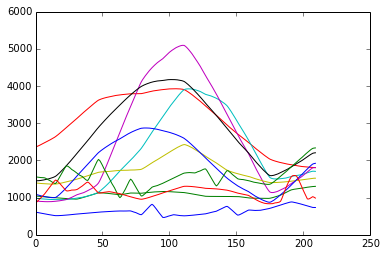

In [231]:
centroids=k_means_clust(comb,10,10,5)
for i in centroids:    
    plt.plot(i)
plt.show()

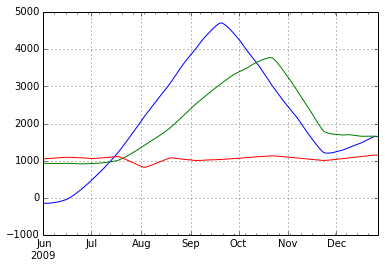

In [168]:
evi.plot()
evi2.plot()
evi3.plot()

In [188]:
centroids=k_means_clust(data,2,10,5)
for i in centroids:
    
    plt.plot(i)

plt.show()


1


TypeError: 'int' object is not iterable

In [190]:
train = np.genfromtxt('/home/faizan/Desktop/te.csv', delimiter='\t')

In [191]:
data=np.vstack((train[:,:-1],train[:,:-1]))

In [192]:
data

array([[-1.4139728 , -1.1620647 , -0.62417387, ...,  1.3630718 ,
         0.72553966, -0.88008903],
       [-1.115918  ,  0.23716141,  1.6308144 , ..., -1.3665346 ,
        -0.66266115, -1.2489139 ],
       [-1.2857446 , -0.06746462, -0.55532233, ..., -1.6829035 ,
         0.89153789,  1.5520388 ],
       ..., 
       [-0.10808234, -0.97877163, -0.55061271, ...,  0.78514926,
         0.36594352,  0.8416499 ],
       [-0.63008704, -0.5506395 ,  0.58111432, ..., -0.49145736,
        -0.96981644, -0.49904942],
       [ 0.81303753,  0.01441759,  1.2853706 , ...,  0.93264908,
         0.15278736, -0.03264544]])

1
2
3
4
5
6
7
8
9
10


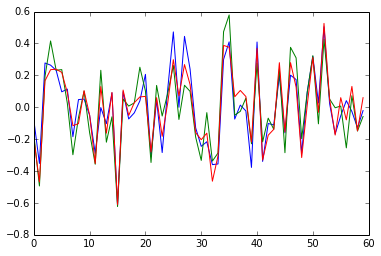

In [193]:
centroids=k_means_clust(data,3,10,5)
for i in centroids:
    
    plt.plot(i)

plt.show()

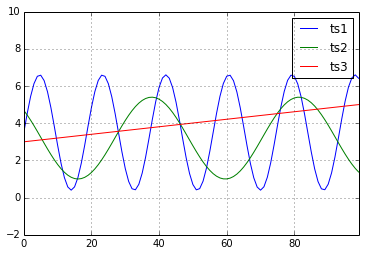

In [62]:
x=np.linspace(0,50,100)
ts1=pd.Series(3.1*np.sin(x/1.5)+3.5)
ts2=pd.Series(2.2*np.sin(x/3.5+2.4)+3.2)
ts3=pd.Series(0.04*x+3.0)

ts1.plot()
ts2.plot()
ts3.plot()

plt.ylim(-2,10)
plt.legend(['ts1','ts2','ts3'])
plt.show()

In [19]:
evi

2009-01-01    1708
2009-01-02    1719
2009-01-03    1730
2009-01-04    1742
2009-01-05    1754
2009-01-06    1767
2009-01-07    1784
2009-01-08    1808
2009-01-09    1835
2009-01-10    1864
2009-01-11    1894
2009-01-12    1924
2009-01-13    1954
2009-01-14    1986
2009-01-15    2018
2009-01-16    2048
2009-01-17    2078
2009-01-18    2108
2009-01-19    2138
2009-01-20    2169
2009-01-21    2200
2009-01-22    2231
2009-01-23    2261
2009-01-24    2291
2009-01-25    2320
2009-01-26    2348
2009-01-27    2377
2009-01-28    2404
2009-01-29    2430
2009-01-30    2456
              ... 
2009-11-28    1215
2009-11-29    1222
2009-11-30    1234
2009-12-01    1247
2009-12-02    1256
2009-12-03    1266
2009-12-04    1277
2009-12-05    1289
2009-12-06    1305
2009-12-07    1323
2009-12-08    1341
2009-12-09    1359
2009-12-10    1375
2009-12-11    1391
2009-12-12    1408
2009-12-13    1425
2009-12-14    1441
2009-12-15    1458
2009-12-16    1474
2009-12-17    1491
2009-12-18    1513
2009-12-19  

In [ ]:

D=[]
for i in range(len(evi)):
    D.append([time1[i], evi[i]])


#clf= KMeans(n_clusters=3)
clf= KMeans(n_init=20,n_clusters=3)

clf.fit(D)

centroid = clf.cluster_centers_
lables= clf.labels_

print centroid 
print lables

colors = ["g,", "r,", "c", "b", "c", "g", "d", "k"]

for l in range(len(D)):
    #print("cor:", D[l], "lab:", lables[l])
    plt.plot(D[l][0], D[l][1], colors[lables[l]], markersize=10)
    
plt.scatter(centroid[:,0], centroid[:,1], marker="x", s=150, linewidths=5, zorder=10)
plt.show()